In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

#Convierte lista en una string
def conv_string(l):
    s = ""
    for n in l:
        s = s+str(n)
    return s

#Convierte un string en lista con cada caracter en su posicion
def convString_list(s):
    l = []
    for n in s:
        l.append(n)
    return l
    
#Convierte el entero en una lista de strings
def convInt_list(n):
    l = []
    n_str = str(n)
    for char in n_str:
        l.append(int(char))
    return l
    
#Arregla los digitos del string con el procedimiento de Kaprekar
def arreglarStr_nStr(n_str,digitos):
    while len(n_str) < digitos:
        n_list = convString_list(n_str)
        n_list.insert(0, "0")
        n_str = conv_string(n_list)
    return n_str


#RECIBE LOS DIGITOS DEL NUMERO INGRESADO POR EL USUARIO Y DEVUELVE LAS ITERACIONES REALIZADAS ---->
def Kaprekar(n_str):
    n_list = convString_list(n_str)
    digitos = len(n_list)
    pasos = 0
    nAux_list = []
    k_up_list = []
    k_low_list = []
    aux_break = 0
    aparecieron_list = []
    repetidas_list = []

    while aux_break == 0:
        #ORDENAR LISTAS ---->
        k_low_list = n_list
        k_low_list.sort()
        k_up_list = []
        for i in range(len(k_low_list)-1,-1,-1):
            k_up_list.append(k_low_list[i])
        #<---- ORDENAR LISTAS

        #EVALUAR CONVERGENCIA ---->
        if n_list in repetidas_list:
            aux_break = 1
            return pasos-1
        #<---- EVALUAR CONVERGENCIA

        #CREACION DE n ---->
        k_low_str = conv_string(k_low_list)
        k_up_str = conv_string(k_up_list)
        #print(f"{n_str} --> {k_up_str} - {k_low_str} = {int(k_up_str) - int(k_low_str)}")
        n_int = int(k_up_str) - int(k_low_str)
        n_str = arreglarStr_nStr(str(n_int),digitos)
        n_list = convString_list(n_str)
        #print (f"n_list: {n_list}  in  {aparecieron_list}")
        #<---- CREACION DE n

        #ARMAR LISTAS DE REPETIDOS Y APARICIONES ---->
        if n_list in aparecieron_list:
            repetidas_list.append(n_list)
        nAux_list = []
        for i in range(len(n_list)):
            nAux_list.append(n_list[i])
        aparecieron_list.append(nAux_list)
        #<---- ARMAR LISTAS DE REPETIDOS Y APARICIONES
        pasos = pasos+1
#<---- RECIBE LOS DIGITOS DEL NUMERO INGRESADO POR EL USUARIO Y DEVUELVE LAS ITERACIONES

num = int(input("INGRESAR NUMERO: "))
print("Converge a la ",Kaprekar(str(num)),"° iteracion de Kaprekar")

INGRESAR NUMERO:  7896


Converge a la  3 ° iteracion de Kaprekar


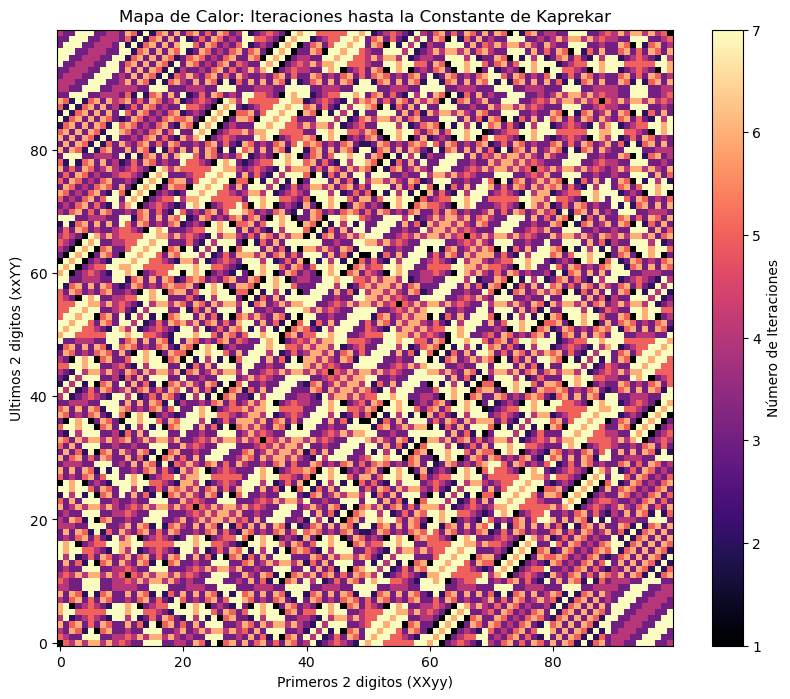

In [12]:
#ALMACENA EN UN ARRAY LAS ITERACIONES QUE REALIZAN LOS NUMEROS DESDE EL 0001 HASTA EL 9999 --->
def mapeo():
    map_pasos_list = []
    #ARRAY DE ITERACIONES ---->
    for i in range(10000):
        pixel = arreglarStr_nStr(str(i),4)
        step = Kaprekar(pixel)
        map_pasos_list.append(step)
    #<--- ARRAY DE ITERACIONES   
    return np.array(map_pasos_list)
#<--- ALMACENA EN UN ARRAY LAS ITERACIONES QUE REALIZAN LOS NUMEROS DESDE EL 0001 HASTA EL 9999

#GRAFICA EL MAPA DE CALOR PREVIAMENTE MAPEADO --->
def graficar():
    iteraciones = mapeo()

    # Redimensionar la matriz de iteraciones a una forma 100x100
    iteraciones_matriz = iteraciones.reshape((100, 100))

    #CREAR MAPA DE CALOR ---->
    plt.figure(figsize=(10, 8))
    plt.imshow(iteraciones_matriz, cmap='magma', origin='lower')
    plt.colorbar(label='Número de Iteraciones')
    #<--- CREAR MAPA DE CALOR

    #CONFIGURAR ETIQUETAS ---->
    plt.title('Mapa de Calor: Iteraciones hasta la Constante de Kaprekar')
    plt.xlabel('Primeros 2 digitos (XXyy)')
    plt.ylabel('Ultimos 2 digitos (xxYY)')
    plt.grid(False)
    plt.show()
    #<---CONFIGURAR ETIQUETA
#<--- GRAFICA EL MAPA DE CALOR PREVIAMENTE MAPEADO

graficar()